In [1]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt  

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import scipy.constants as cst
C_SI = cst.c
G_SI = cst.G

## Analytical developement

According to [Minazzoli & Hees, PRD, 88, 041504(R)] the potential in Entangled Relativity should read as follows

$$w=w_{\mathrm{GR}}- \frac{G_{\mathrm{eff}}}{c^{2}} \int \frac{P\left(\mathbf{x}^{\prime}\right) d^{3} x^{\prime}}{\left|\mathbf{x}-\mathbf{x}^{\prime}\right|}+\mathcal{O}\left(1 / c^{4}\right),$$

given that $\omega_0 = 0$ in the specific case of Entangled Relativity. Assuming that the body is spherical, the integral reads

$$\frac{1}{c^2}\int \frac{P\left(\mathbf{x}^{\prime}\right) d^{3} x^{\prime}}{\left|\mathbf{x}-\mathbf{x}^{\prime}\right|} = \frac{M^P}{r},$$

where

$$M^P := 4 \pi \int \frac{r^2~P(r)}{c^2}  dr.$$

The mass of the body that would be derived from the dynamics of orbiting bodies, on the other hand, reads

$$M := 4 \pi \int r^2~\rho(r)  dr,$$

where $\rho$ is the density.

## Case of the Sun

In [3]:
SUN_model = np.genfromtxt('Sun_profile', comments = '#') # Everything is in SI (https://users-phys.au.dk/jcd/solar_models/)

#Christensen-Dalsgaard, J., Däppen, W., Ajukov, S. V., Anderson, E. R., Antia, H. M., Basu, S., Baturin, V. A., Berthomieu, G., Chaboyer, B., Chitre, S. M., Cox, A. N., Demarque, P., Donatowicz, J., Dziembowski, W. A., Gabriel, M., Gough, D. O., Guenther, D. B., Guzik, J. A., Harvey, J. W., Hill, F., Houdek, G., Iglesias, C. A., Kosovichev, A. G., Leibacher, J. W., Morel, P., Proffitt, C. R., Provost, J., Reiter, J., Rhodes Jr., E. J., Rogers, F. J., Roxburgh, I. W., Thompson, M. J., Ulrich, R. K., 1996.
#The current state of solar modeling.
#Science, 272, 1286 - 1292. 

In [4]:
PSUN_center_bar = 2.477e11 # (bar) https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html (hereafter referred to as 'NASA')
rhoSUN_center = 1.622e5 # kg/m^3 https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

barTOpascal = 1e5

PSUN_center = PSUN_center_bar * barTOpascal # pascal

print(f'For the sun, at the center, the ratio between the pressure and density is {PSUN_center / (rhoSUN_center*C_SI**2)}')

For the sun, at the center, the ratio between the pressure and density is 1.699157946266839e-06


In [5]:
SUN_radius = 695700*1e3 # m https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html
# Density
Density_SUN = SUN_model[:,2] * 1e-3 / (1e-2)**3 # kg/m^3
# Pressure
Pressure_SUN = SUN_model[:,3] / 10 # pascal (bc, given in dyn/cm^2)
# Radius of the Sun
Radius_SUN =  SUN_model[:,0] * SUN_radius

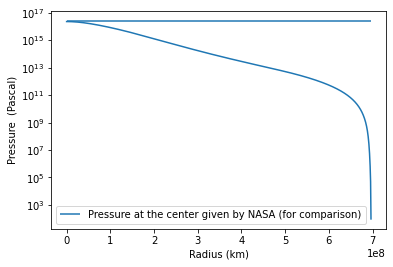

In [6]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Pressure_SUN) 
ax.hlines(y = PSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Pressure at the center given by NASA (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Pressure  (Pascal)')
plt.legend()
plt.show()

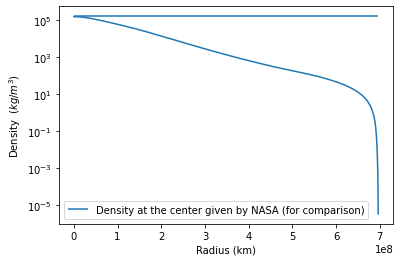

In [7]:
img, ax = plt.subplots()
ax.plot(Radius_SUN,Density_SUN) 
ax.hlines(y = rhoSUN_center, xmin = 0 , xmax = SUN_radius , label = 'Density at the center given by NASA (for comparison)')
ax.set_yscale('log')
plt.xlabel('Radius (km)')
plt.ylabel('Density  ($kg/m^3$)')
plt.legend()
plt.show()

In [8]:
# Pressure over c^2
Poc2_SUN = Pressure_SUN / C_SI**2 

# r^2
R2_SUN = Radius_SUN * Radius_SUN

rhoR2_SUN = Density_SUN * R2_SUN
Poc2R2_SUN = Poc2_SUN * R2_SUN


M_SUN = 4 * np.pi * simps(rhoR2_SUN,-Radius_SUN)

MPoc_SUN = 4 * np.pi * simps(Poc2R2_SUN,-Radius_SUN)

In [9]:
print(f'Computed mass of the Sun = {M_SUN:.3e} kg, whereas NASA gives M = 1.9885e+30 kg')
print(f'Ratio between the M_P and M for the Sun = {MPoc_SUN/M_SUN:.1e}')
print('The ratio is of the same order as the ratio between the central pressure and density computed above')

Computed mass of the Sun = 1.987e+30 kg, whereas NASA gives M = 1.9885e+30 kg
Ratio between the M_P and M for the Sun = 1.1e-06
The ratio is of the same order as the ratio between the central pressure and density computed above


The variation of $\hbar$ due to the Sun's potential between its surface and an observer located on the Earth reads
$$\frac{\Delta \hbar}{\hbar} = \frac{G M^P_\odot}{c^2}\left(\frac{1}{r_\odot}-\frac{1}{r_\oplus} \right) \approx \frac{G M^P_\odot}{r_\odot c^2}$$

In [10]:
relative_delta_h = cst.G * MPoc_SUN / Radius_SUN[0] / C_SI**2
print(f'The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth is {relative_delta_h:.1e}')

The variation of $\hbar$ in the potential of the Sun between the surface and an observer located on the Earth is 2.4e-12
